# 2. Building predicion model

## 2.1 Data import and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\df_train.csv')
df_Kaggle = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\df_test_Kaggle.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3
0,1,0.0,3,22.0,2,1,0.00,7.25000,1.0,0.0,1.0,0.0,1.0
1,2,1.0,1,38.0,2,2,0.25,35.64165,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,26.0,1,1,1.00,7.92500,0.0,0.0,1.0,0.0,1.0
3,4,1.0,1,35.0,2,2,0.25,26.55000,0.0,0.0,1.0,0.0,0.0
4,5,0.0,3,35.0,1,1,0.00,8.05000,1.0,0.0,1.0,0.0,1.0


In [4]:
df_Kaggle.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3
0,892,NaN,3,34.5,1,1,0.00,7.82920,1.0,1.0,0.0,0.0,1.0
1,893,NaN,3,47.0,2,1,0.00,7.00000,0.0,0.0,1.0,0.0,1.0
2,894,NaN,2,62.0,1,1,0.00,9.68750,1.0,1.0,0.0,0.0,1.0
3,895,NaN,3,27.0,1,1,0.00,8.66250,1.0,0.0,1.0,0.0,1.0
4,896,NaN,3,22.0,3,2,0.25,6.14375,0.0,0.0,1.0,0.0,1.0


In [5]:
drop_columns=['PassengerId', 'Survived']
X = df_train.drop(columns=drop_columns)
y = df_train['Survived']

I will split train data into train and test set in order to check quality of prediction on test set

In [6]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_Kaggle_s = df_Kaggle.drop(columns=drop_columns)

In [7]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_s)
X_test_sc = sc.transform(X_test_s)
X_Kaggle_sc = sc.transform(df_Kaggle.drop(columns=drop_columns))

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report(y_pred):
    print('\nClassification report')    
    print(classification_report(y_test, y_pred))
    print('\nConfusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

In [9]:
def save(y_pred, model_name):
    submission = pd.DataFrame({
            "PassengerId": df_Kaggle["PassengerId"],
            "Survived": y_pred
            },dtype=np.int32)
    submission.to_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\submission_' + model_name + '.csv', index=False)
    return submission

## 2.2. Prediction with various models

In [10]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [11]:
models = {'Logistic Regression' : LogisticRegression(max_iter=500),
          'Random forest' : RandomForestClassifier(random_state=0),
          'Decision tree': DecisionTreeClassifier(),
          'XGDBoost' : XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
          'Stochastic gradient descent' : SGDClassifier(random_state=0),
          'Naive Bayes' : GaussianNB(),
          'Support Vector Classifier' : SVC(C=0.1, gamma=1, kernel='linear'),
          'KNN' : KNeighborsClassifier(n_neighbors=3)
         }


Logistic Regression

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       106
         1.0       0.94      0.88      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  9  64]]


Accuracy: 0.927
Feature: 0, Score: 0.0480
Feature: 1, Score: 0.0205
Feature: 2, Score: 0.0045
Feature: 3, Score: 0.0171
Feature: 4, Score: 0.2638
Feature: 5, Score: -0.0011
Feature: 6, Score: 0.0941
Feature: 7, Score: -0.0020
Feature: 8, Score: -0.0003
Feature: 9, Score: 0.0000
Feature: 10, Score: -0.0014


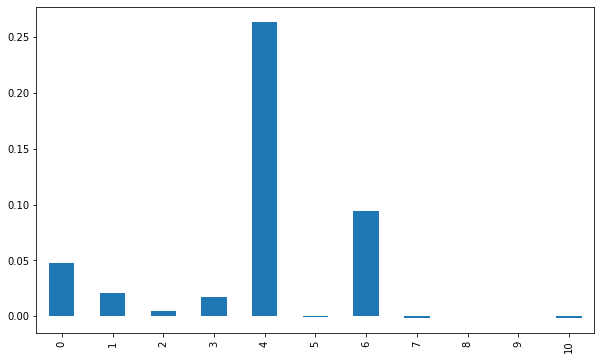


Random forest

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       106
         1.0       0.96      0.95      0.95        73

    accuracy                           0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179


Confusion matrix
[[103   3]
 [  4  69]]


Accuracy: 0.961
Feature: 0, Score: 0.0008
Feature: 1, Score: 0.0278
Feature: 2, Score: 0.0048
Feature: 3, Score: 0.0051
Feature: 4, Score: 0.3949
Feature: 5, Score: 0.0042
Feature: 6, Score: 0.0848
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0022
Feature: 9, Score: 0.0017
Feature: 10, Score: 0.0048


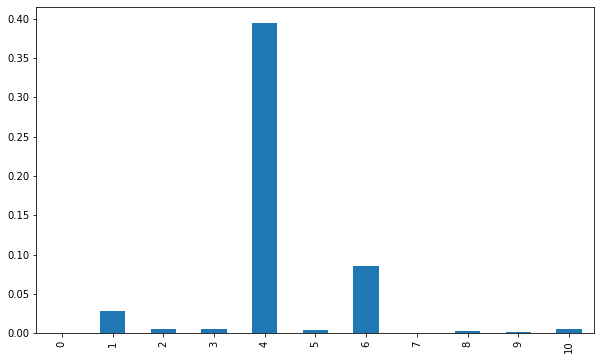

feature     Survival_rate  Sex_2    Age  Fare_per_person  Pclass  \
importance          0.612  0.158  0.057             0.05   0.031   

feature     Ticket_frequency  Family_size  Deck_3  Deck_2  Embarked_3  \
importance              0.03        0.026   0.019   0.008       0.007   

feature     Embarked_2  
importance       0.002  


<Figure size 432x288 with 0 Axes>

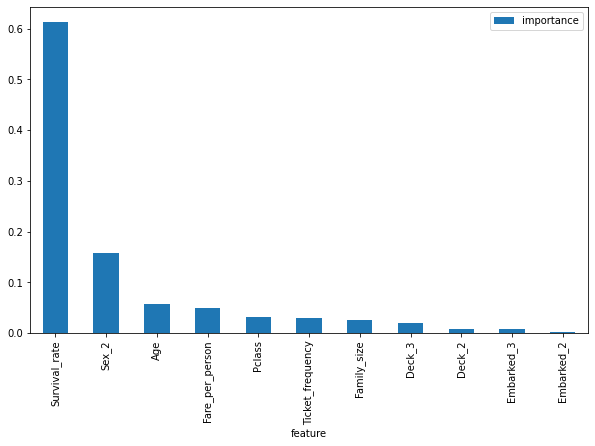


Decision tree

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       106
         1.0       0.99      0.95      0.97        73

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179


Confusion matrix
[[105   1]
 [  4  69]]


Accuracy: 0.972
Feature: 0, Score: 0.0020
Feature: 1, Score: 0.0267
Feature: 2, Score: 0.0045
Feature: 3, Score: 0.0143
Feature: 4, Score: 0.3978
Feature: 5, Score: 0.0048
Feature: 6, Score: 0.0817
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0034
Feature: 9, Score: 0.0065
Feature: 10, Score: 0.0000


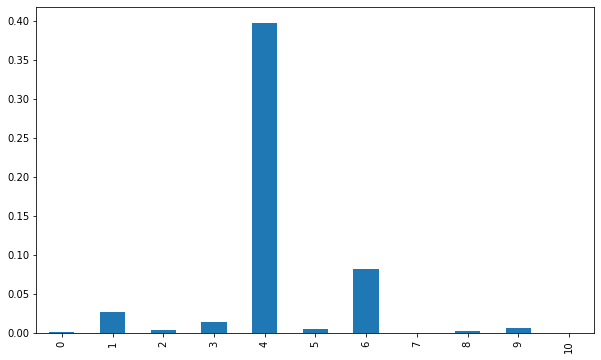

feature     Survival_rate    Age  Sex_2  Ticket_frequency  Fare_per_person  \
importance          0.859  0.056  0.053             0.009            0.007   

feature     Family_size  Embarked_3  Deck_2  Pclass  Embarked_2  Deck_3  
importance        0.005       0.005   0.004   0.003         0.0     0.0  


<Figure size 432x288 with 0 Axes>

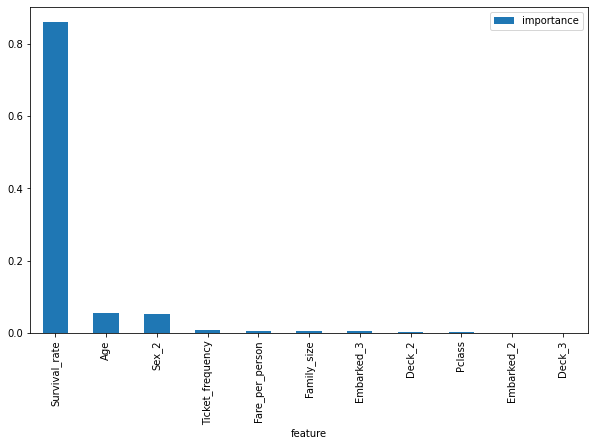


XGDBoost

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       106
         1.0       0.99      0.95      0.97        73

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179


Confusion matrix
[[105   1]
 [  4  69]]


Accuracy: 0.972
Feature: 0, Score: 0.0000
Feature: 1, Score: 0.0323
Feature: 2, Score: 0.0051
Feature: 3, Score: 0.0034
Feature: 4, Score: 0.3860
Feature: 5, Score: 0.0034
Feature: 6, Score: 0.0840
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0039
Feature: 9, Score: 0.0000
Feature: 10, Score: 0.0067


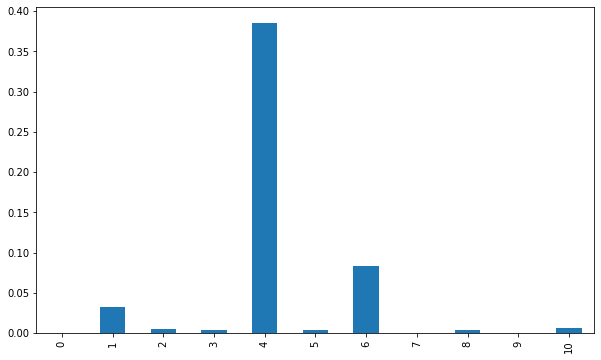

feature     Survival_rate  Sex_2    Age  Deck_3  Family_size  \
importance          0.741  0.164  0.026   0.017        0.013   

feature     Ticket_frequency  Embarked_3  Pclass  Fare_per_person  Embarked_2  \
importance             0.012       0.012   0.008            0.007         0.0   

feature     Deck_2  
importance     0.0  


<Figure size 432x288 with 0 Axes>

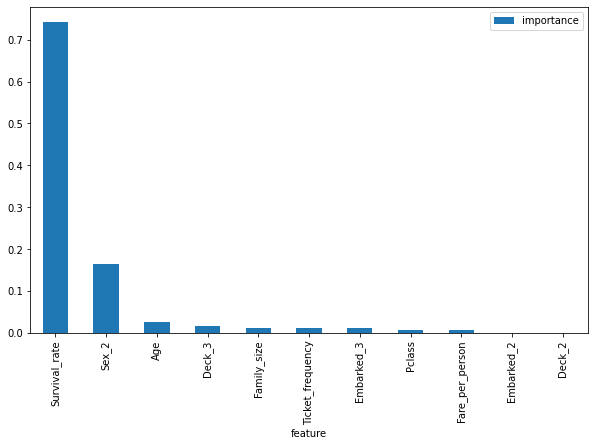


Stochastic gradient descent

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       106
         1.0       0.93      0.89      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[101   5]
 [  8  65]]


Accuracy: 0.927
Feature: 0, Score: 0.0000
Feature: 1, Score: 0.0323
Feature: 2, Score: 0.0051
Feature: 3, Score: 0.0034
Feature: 4, Score: 0.3860
Feature: 5, Score: 0.0034
Feature: 6, Score: 0.0840
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0039
Feature: 9, Score: 0.0000
Feature: 10, Score: 0.0067


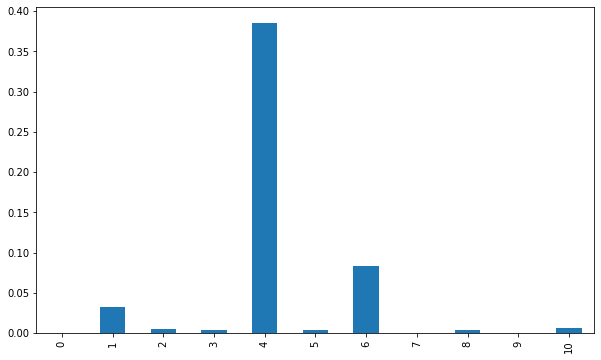

Feature: 0, Score: 0.0253
Feature: 1, Score: -0.0081
Feature: 2, Score: 0.0107
Feature: 3, Score: 0.0174
Feature: 4, Score: 0.2272
Feature: 5, Score: 0.0056
Feature: 6, Score: 0.1000
Feature: 7, Score: 0.0000
Feature: 8, Score: -0.0039
Feature: 9, Score: 0.0053
Feature: 10, Score: 0.0008


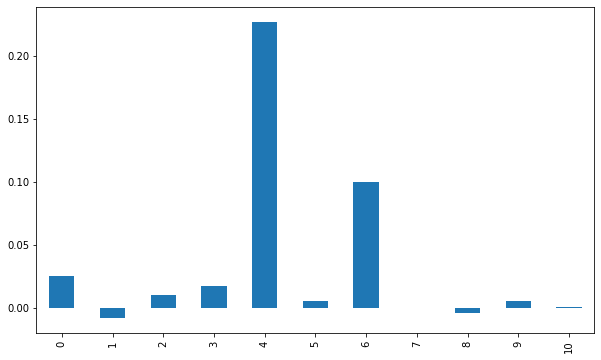


Naive Bayes

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       106
         1.0       0.82      0.90      0.86        73

    accuracy                           0.88       179
   macro avg       0.88      0.89      0.88       179
weighted avg       0.89      0.88      0.88       179


Confusion matrix
[[92 14]
 [ 7 66]]


Accuracy: 0.883
Feature: 0, Score: -0.0126
Feature: 1, Score: 0.0017
Feature: 2, Score: 0.0037
Feature: 3, Score: 0.0042
Feature: 4, Score: 0.2730
Feature: 5, Score: -0.0067
Feature: 6, Score: 0.0174
Feature: 7, Score: 0.0003
Feature: 8, Score: 0.0034
Feature: 9, Score: 0.0267
Feature: 10, Score: -0.0048


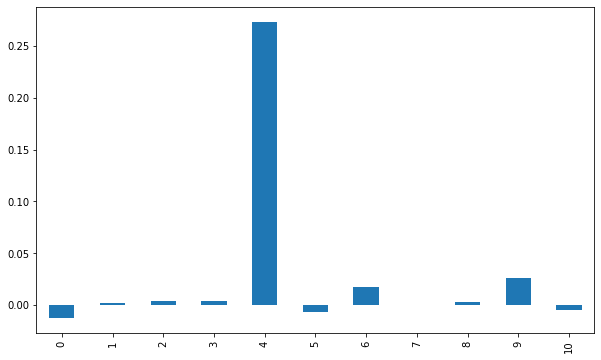


Support Vector Classifier

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       106
         1.0       0.94      0.88      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  9  64]]


Accuracy: 0.927
Feature: 0, Score: -0.0126
Feature: 1, Score: 0.0017
Feature: 2, Score: 0.0037
Feature: 3, Score: 0.0042
Feature: 4, Score: 0.2730
Feature: 5, Score: -0.0067
Feature: 6, Score: 0.0174
Feature: 7, Score: 0.0003
Feature: 8, Score: 0.0034
Feature: 9, Score: 0.0267
Feature: 10, Score: -0.0048


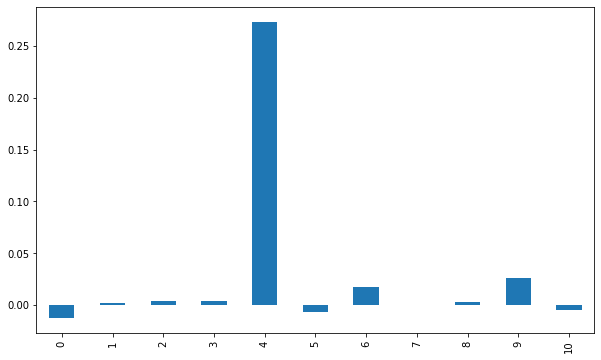

Feature: 0, Score: 0.0663
Feature: 1, Score: 0.0309
Feature: 2, Score: 0.0098
Feature: 3, Score: 0.0096
Feature: 4, Score: 0.2626
Feature: 5, Score: -0.0006
Feature: 6, Score: 0.0958
Feature: 7, Score: 0.0003
Feature: 8, Score: 0.0037
Feature: 9, Score: 0.0006
Feature: 10, Score: -0.0011


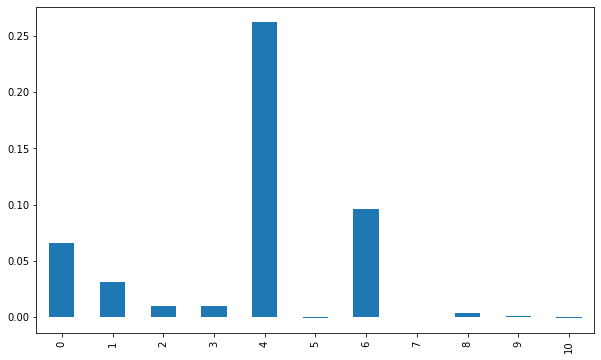


KNN

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       106
         1.0       0.94      0.89      0.92        73

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  8  65]]


Accuracy: 0.933
Feature: 0, Score: 0.0191
Feature: 1, Score: 0.0303
Feature: 2, Score: 0.0135
Feature: 3, Score: 0.0250
Feature: 4, Score: 0.1952
Feature: 5, Score: 0.0034
Feature: 6, Score: 0.1121
Feature: 7, Score: 0.0059
Feature: 8, Score: 0.0093
Feature: 9, Score: 0.0211
Feature: 10, Score: 0.0014


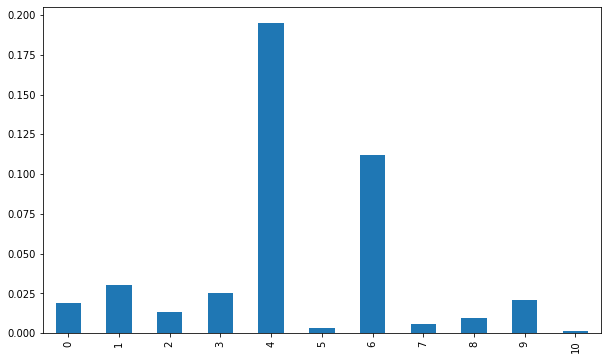

In [12]:
from sklearn.inspection import permutation_importance

model_names = []
accuracy = []

for model_name, model in models.items():
    if model_name == 'KNN':
        X_train = X_train_sc
        X_test = X_test_sc
        X_Kaggle = X_Kaggle_sc
    else:
        X_train = X_train_s
        X_test = X_test_s
        X_Kaggle = X_Kaggle_s
    
    model.fit(X_train, y_train)
    y_Kaggle = model.predict(X_Kaggle)
    y_pred = model.predict(X_test)
    submission = save(y_Kaggle, model_name)
    print('\n'+model_name)
    model_names.append(model_name)
    report(y_pred)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: ' + str(round(acc,3)))
    accuracy.append(acc)
    
    try: #for Logistic regression etc.
        importances = model.coef_[0]
    #     print(importance[0])
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.4f' % (i,v))
        importances = pd.Series(importance)
        plt.figure(figsize=(10,6))
        ax = importances.plot(kind='bar')
        plt.show()
    except:
        pass
    
    try: #for KNN
        # perform permutation importance
        results = permutation_importance(model, X_train, y_train, scoring='accuracy')
        # get importance
        importance = results.importances_mean
        #     print(importance[0])
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.4f' % (i,v))
        importances = pd.Series(importance)
        plt.figure(figsize=(10,6))
        ax = importances.plot(kind='bar')
        plt.show()
    except:
        pass
    
    try: #for Random Forest etc.
        importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
        importances = importances.sort_values('importance',ascending=False).set_index('feature')
        print(importances.T)
        plt.figure()
        importances.plot.bar(figsize=(10,6))
        plt.show()
    except(AttributeError):
        pass

## SVC Grid search

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {'C': [0.1,1, 10, 100,], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.937, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.993, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.965, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.937, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.930, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.986, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.972, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.930, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.979, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.930, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=3)

In [15]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [16]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [17]:
y_pred_grid_svc = grid.predict(X_test)
y_grid_svc_Kaggle = grid.predict(X_Kaggle)

In [18]:
report(y_pred_grid_svc)


Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       106
         1.0       0.97      0.89      0.93        73

    accuracy                           0.94       179
   macro avg       0.95      0.94      0.94       179
weighted avg       0.95      0.94      0.94       179


Confusion matrix
[[104   2]
 [  8  65]]




In [19]:
acc_grid_svc = accuracy_score(y_test, y_pred_grid_svc)
print(acc_grid_svc)

0.9441340782122905


With found values of C and gamma preciction is only a little better than with default parameters.

# KNN - chosing the best n value

In [20]:
from sklearn.neighbors import KNeighborsClassifier

To chose the proper k value I repeat calculations for several k values and I choose the value with minimum error rate. 

In [21]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

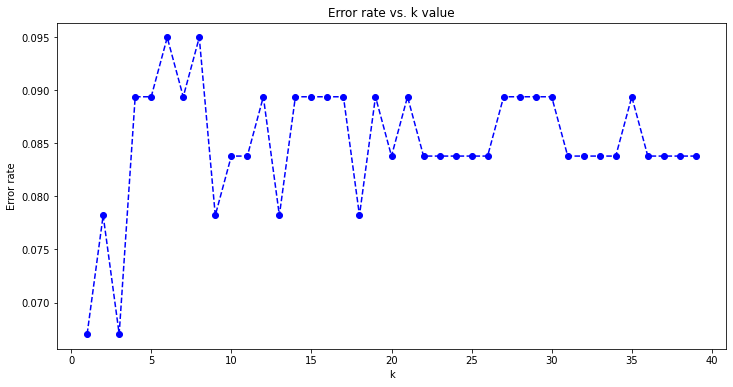

In [22]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue',linestyle = 'dashed', marker='o')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rate vs. k value')
plt.show()

Since in general kNN with k=1 implies over-fitting, I choose k=3

## Prediction results sumarry

In [23]:
results = pd.DataFrame({
    'Model': model_names,
    'Score': accuracy})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Decision tree,0.972067
XGDBoost,0.972067
Random forest,0.960894
KNN,0.932961
Logistic Regression,0.927374
Stochastic gradient descent,0.927374
Support Vector Classifier,0.927374
Naive Bayes,0.882682


### Results of predictions on Kaggle test set

After checking all generated submission datasets I see huge discrepacy between results on Kaggle webside and on test set. 
It is due to the fact, that feature ```Survived_rate``` for original train set used to make train_test_split and further 
model evaluation is calculated based mostly on well known ```Survived``` feature in train set. The values of ```Survived_rate```
for real test set are evaluated on the basis of known values from train set and sometimes estimation is not working well.
Only KNN works better than simple gender submission. It indicates that I did sth wrong during feature engineering, 
I have to look at that later.

## K-fold cross validation

In [24]:
# pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\summary.csv').sort_values(by='publicScore', ascending = False)

In [25]:
model_names = []
accuracy = []

for model_name, model in models.items():
    if model_name == 'KNN':
        X_train = X_train_sc
        X_test = X_test_sc
        X_Kaggle = X_Kaggle_sc
    else:
        X_train = X_train_s
        X_test = X_test_s
        X_Kaggle = X_Kaggle_s
    
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring = "accuracy")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
    model.fit(X_train, y_train)
    y_Kaggle = model.predict(X_Kaggle)
    y_pred = model.predict(X_test)
    submission = save(y_Kaggle, model_name)
    print('\n'+model_name)
    model_names.append(model_name)
    report(y_pred)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: ' + str(round(acc,3)))
    accuracy.append(acc)
    model.score(X_train, y_train)

    acc_model = round(model.score(X_train, y_train) * 100, 2)
    print('Accuracy: ', round(acc_model,2,), "%")

Scores: [0.97222222 0.95833333 0.94366197 0.91549296 0.98591549 0.95774648
 0.94366197 0.94366197 0.92957746 0.90140845]
Mean: 0.9451682316118937
Standard Deviation: 0.02401917711418485

Logistic Regression

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       106
         1.0       0.94      0.88      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  9  64]]


Accuracy: 0.927
Accuracy:  95.51 %
Scores: [0.97222222 0.95833333 0.92957746 0.92957746 1.         0.98591549
 0.98591549 1.         0.98591549 0.94366197]
Mean: 0.9691118935837245
Standard Deviation: 0.025796754126358824

Random forest

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       106
         1.0       0.96      0.

In [26]:
results = pd.DataFrame({
    'Model': model_names,
    'Score': accuracy})
result_df_cv = results.sort_values(by='Score', ascending=False)
result_df_cv = result_df_cv.set_index('Model')
summary = pd.merge(result_df, result_df_cv, on='Model',how='inner')
summary.columns = ['Without CV', 'With CV']
summary

,Without CV,With CV
Model,,
Decision tree,0.972067,0.972067
XGDBoost,0.972067,0.972067
Random forest,0.960894,0.960894
KNN,0.932961,0.932961
Logistic Regression,0.927374,0.927374
Stochastic gradient descent,0.927374,0.927374
Support Vector Classifier,0.927374,0.927374
Naive Bayes,0.882682,0.882682


In [27]:
# summary.to_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\summary.csv')